# NYC Taxi Project

# Data Gathering & Preparation

### Load 2016 NYC Taxi data from BigQuery

In [2]:
import pandas as pd
import os

# go to https://cloud.google.com/docs/authentication/getting-started to set up an account and an API key
# replace the link below with the JSON file that gets downloaded
pd.set_option('display.max_columns', 500)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./My First Project-ebcdd06f0c10.json"

Here we compute the time bewteen pickup and dropoff and generate our response variable `travel_time`. We then join the taxi data with the publicly available 2016 weather data.

In [3]:
from google.cloud import bigquery
client = bigquery.Client()

query = (
    """
    SELECT * FROM 
    (
    SELECT *,
    TIMESTAMP_DIFF( dropoff_datetime, pickup_datetime, SECOND) as travel_time,
     EXTRACT (DATE FROM pickup_datetime) as date_of_year,
     EXTRACT (DAY FROM pickup_datetime) as day_of_year,
     EXTRACT (MONTH FROM pickup_datetime) as month_of_year,
     EXTRACT (YEAR FROM pickup_datetime) as year_of_year
    FROM `bigquery-public-data.new_york.tlc_yellow_trips_2016` ) a 
    INNER JOIN
    (
     select concat(year,'-',mo,'-',da) as date_of_year2,year,mo,da,temp,visib,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
     from `bigquery-public-data.noaa_gsod.gsod2016` where stn='010090'
    ) weather_data
    on CAST(a.date_of_year AS STRING) = weather_data.date_of_year2
    LIMIT 200000"""
)
df=pd.io.gbq.read_gbq(query,dialect='standard')


In [4]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,travel_time,date_of_year,day_of_year,month_of_year,year_of_year,date_of_year2,year,mo,da,temp,visib,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
0,2,2016-04-19 03:23:30+00:00,2016-04-19 03:52:34+00:00,1,9.12,-73.997597,40.756592,1,N,-73.99794,40.75668,1,29.5,0.5,0.5,1.00,0.0,0.3,31.80,1744,2016-04-19,19,4,2016,2016-04-19,2016,04,19,20.8,999.9,20.9,999.9,23.0,14.9,0.0,999.9,0,0,0,0,0
1,2,2016-10-21 22:45:39+00:00,2016-10-21 23:15:53+00:00,2,10.73,NaN,NaN,1,N,NaN,NaN,1,33.0,0.5,0.5,6.86,0.0,0.3,41.16,1814,2016-10-21,21,10,2016,2016-10-21,2016,10,21,36.2,999.9,23.0,999.9,43.0,27.1,0.0,999.9,0,0,0,0,0
2,1,2016-08-01 07:09:11+00:00,2016-08-01 07:09:22+00:00,1,0.00,NaN,NaN,1,N,NaN,NaN,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30,11,2016-08-01,1,8,2016,2016-08-01,2016,08,01,34.2,999.9,10.6,999.9,35.6,32.2,0.0,999.9,0,0,0,0,0
3,2,2016-08-20 07:26:04+00:00,2016-08-20 08:16:57+00:00,1,13.48,NaN,NaN,1,N,NaN,NaN,2,48.5,0.0,0.5,0.00,0.0,0.3,49.30,3053,2016-08-20,20,8,2016,2016-08-20,2016,08,20,38.1,999.9,7.7,999.9,41.2,35.1,0.0,999.9,0,0,0,0,0
4,1,2016-07-23 09:58:46+00:00,2016-07-23 10:23:39+00:00,1,5.50,NaN,NaN,1,N,NaN,NaN,2,23.0,0.0,0.5,0.00,0.0,0.3,23.80,1493,2016-07-23,23,7,2016,2016-07-23,2016,07,23,40.0,999.9,8.8,999.9,43.7,37.2,0.0,999.9,0,0,0,0,0


### Remove missing values

In [11]:
# Remove missing values
print('Original data size: ',len(df))
df = df.dropna()
print('After filter with NaN:', len(df))
df.head()

Original data size:  105991
After filter with NaN: 105991


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,travel_time,date_of_year,day_of_year,month_of_year,year_of_year,date_of_year2,year,mo,da,temp,visib,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
0,2,2016-04-19 03:23:30+00:00,2016-04-19 03:52:34+00:00,1,9.12,-73.997597,40.756592,1,N,-73.997940,40.756680,1,29.5,0.5,0.5,1.00,0.0,0.3,31.80,1744,2016-04-19,19,4,2016,2016-04-19,2016,04,19,20.8,999.9,20.9,999.9,23.0,14.9,0.0,999.9,0,0,0,0,0
5,2,2016-03-21 06:45:31+00:00,2016-03-21 07:08:16+00:00,1,11.32,-73.776741,40.645466,1,N,-73.709724,40.746422,1,31.0,0.0,0.5,6.36,0.0,0.3,38.16,1365,2016-03-21,21,3,2016,2016-03-21,2016,03,21,5.5,999.9,16.8,999.9,8.1,3.4,0.0,999.9,0,0,0,0,0
6,1,2016-01-12 08:26:57+00:00,2016-01-12 09:02:51+00:00,2,6.30,-74.000999,40.710278,1,N,-73.976265,40.783081,1,28.0,0.0,0.5,1.00,0.0,0.3,29.80,2154,2016-01-12,12,1,2016,2016-01-12,2016,01,12,21.3,999.9,3.8,999.9,24.1,18.9,0.0,999.9,0,0,0,0,0
8,2,2016-06-26 20:11:33+00:00,2016-06-26 20:11:38+00:00,1,0.00,-73.781906,40.644543,1,N,-73.781868,40.644447,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,5,2016-06-26,26,6,2016,2016-06-26,2016,06,26,36.7,999.9,5.7,999.9,41.7,34.3,0.0,999.9,0,0,0,0,0
9,2,2016-02-09 22:25:37+00:00,2016-02-09 22:26:01+00:00,6,0.00,-74.063126,40.613476,1,N,0.000000,0.000000,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,24,2016-02-09,9,2,2016,2016-02-09,2016,02,09,22.0,999.9,25.8,999.9,25.7,15.8,0.0,999.9,0,0,0,0,0


## Visualize the features of each value
In order to analyse features, I first visualize all features and oberserve the abnormal values of each feature. Meanwhile, I find that some features are useless due to the single value, for example, hail feature in weather.

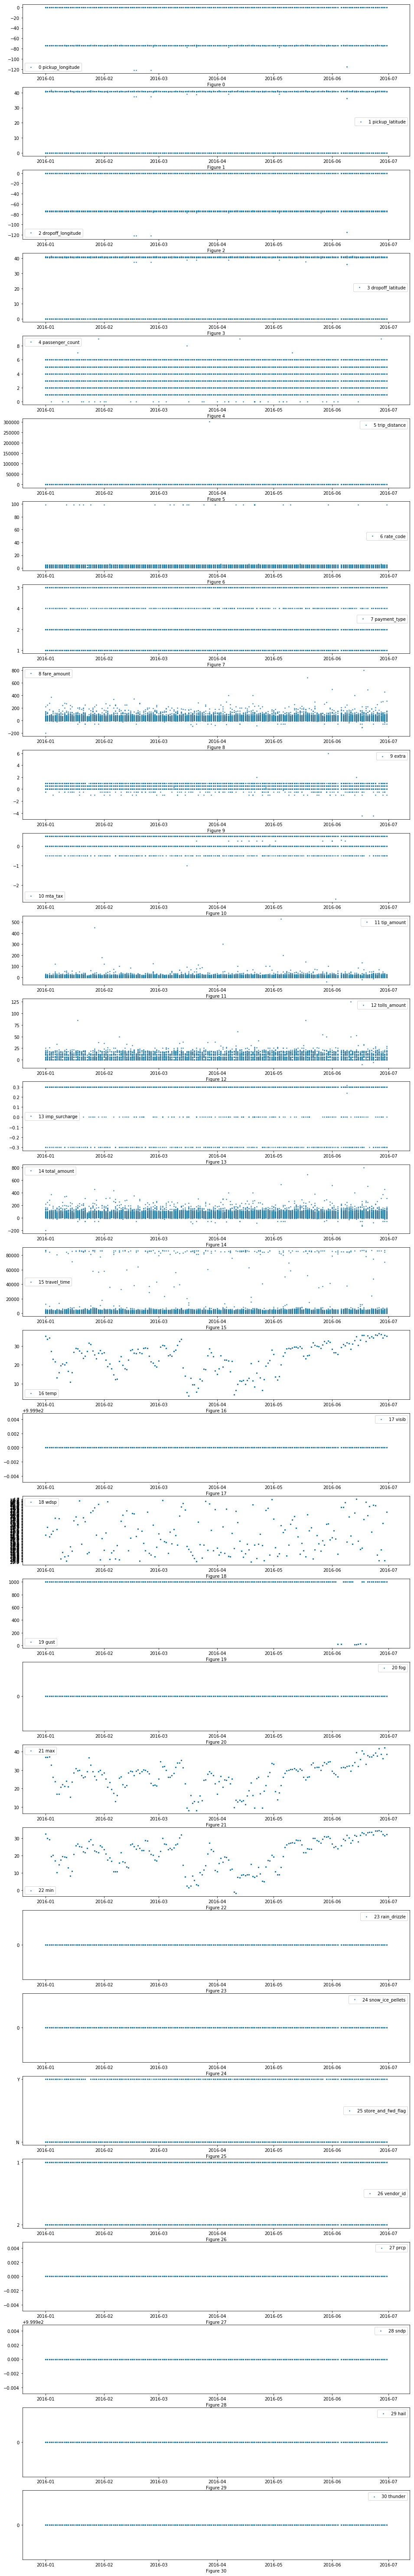

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

## We select candidate features from original dataframe.

focused_features = ['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude',\
                    'passenger_count', 'trip_distance',\
                    'rate_code', 'payment_type','fare_amount','extra', \
                    'mta_tax', 'tip_amount','tolls_amount','imp_surcharge', \
                    'total_amount', 'travel_time','temp', 'visib','wdsp','gust',\
                    'fog', 'max', 'min','rain_drizzle','snow_ice_pellets','store_and_fwd_flag',\
                    'vendor_id', 'prcp','sndp','hail', 'thunder'\
                   ]

feature = 'pickup_longitude'

## Number of features
rows = len(focused_features)
from datetime import datetime

plt.figure(figsize=(16,rows*3.5))
df= df.sort_values(by=['date_of_year'])
## Visualize each feature to analyse the abnormal values
xr =[ str(x)[:10]for x in df['date_of_year']]
for idx, feature in enumerate(focused_features):
    plt.subplot(rows,1,idx+1)
    plt.scatter(xr, df[feature], s=2, label=str(idx)+' '+feature)
    plt.xticks(xr[::10])
    plt.xlabel('Figure '+ str(idx))
    plt.legend()




## 1.2 Compute haversine distance between pickup and dropoff

In [6]:
from google.cloud import bigquery
client = bigquery.Client()


query = (
    """
CREATE TEMP FUNCTION RADIANS(x FLOAT64) AS (
  ACOS(-1) * x / 180
);
CREATE TEMP FUNCTION RADIANS_TO_KM(x FLOAT64) AS (
  111.045 * 180 * x / ACOS(-1)
);
CREATE TEMP FUNCTION HAVERSINE(lat1 FLOAT64, long1 FLOAT64,
                               lat2 FLOAT64, long2 FLOAT64) AS (
  RADIANS_TO_KM(
    ACOS(COS(RADIANS(lat1)) * COS(RADIANS(lat2)) *
         COS(RADIANS(long1) - RADIANS(long2)) +
         SIN(RADIANS(lat1)) * SIN(RADIANS(lat2))))
);

SELECT
  pickup_latitude,
  pickup_longitude,
  TIMESTAMP_DIFF( dropoff_datetime, pickup_datetime, SECOND) as travel_time,
  HAVERSINE(dropoff_latitude,dropoff_longitude, pickup_latitude, pickup_longitude) AS distance_in_km
FROM `nyc-tlc.yellow.trips`
WHERE pickup_latitude IS NOT NULL AND pickup_longitude IS NOT NULL and dropoff_longitude IS NOT NULL and HAVERSINE(dropoff_latitude,dropoff_longitude, pickup_latitude, pickup_longitude)>0.1 LIMIT 100;
"""
)
df2=pd.io.gbq.read_gbq(query,dialect='standard')

In [7]:
df2.head()

,pickup_latitude,pickup_longitude,travel_time,distance_in_km
0,40.757960,-73.987630,35,1.240719
1,40.758817,-73.984630,843,3.473030
2,40.771859,-73.871434,321,1.183891
3,0.000000,0.000000,12,8650.632979
4,40.699852,-74.133125,6,0.117585


In [15]:
%matplotlib inline

# 2. Remove outliers and filter data

In [16]:
df_filtered=df[(df['travel_time']>0) & (df['distance_in_km']<50)  & (df['travel_time']<1000)]

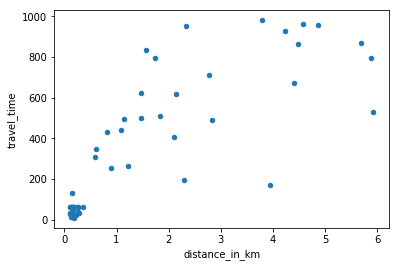

In [17]:
df_filtered.plot(x='distance_in_km',y='travel_time',kind='scatter')

# 3. Build a model and evaluate it

Test Train Split

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
y = df_filtered['travel_time']
X = df_filtered['distance_in_km']

X=np.matrix(X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Random forest model**

In [26]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100,
                             random_state=0)




rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.0625

`rf_clf.score` is actually the $R^2$ score (see documentation)

**Linear model**

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
y = df_filtered['travel_time']
X = df_filtered['distance_in_km']
X=np.matrix(X).reshape(-1,1)
linear_clf = LinearRegression()


linear_clf.fit(X_train,y_train)
linear_clf.score(X_test,y_test)

0.5061546907399057